In [11]:
#install.packages('fpp3')
#install.packages('dtwclust')
library(fpp3)
library(dtwclust)

In [52]:
#reading the data

sales_train_val_set <- readr::read_csv('sales_train_validation_afcs2021.csv')

sales_test_val_set <- readr::read_csv('sales_test_validation_afcs2021.csv')

sale_prices <- readr::read_csv('sell_prices_afcs2021.csv')

#sales_train_val <- readr::read_csv('sales_train_validation_afcs2021.csv')

#sales_train_val <- readr::read_csv('sales_train_validation_afcs2021.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  store_id = col_character(),
  item_id = col_character(),
  wm_yr_wk = col_double(),
  sell_price = col_double()
)



In [53]:
#transposing it so that the days are the rows and the columns are the different products
sales_train_val_set <- as.data.frame(t(as.matrix(sales_train_val_set)))

In [54]:
exploratory_data <- sales_train_val_set 
exploratory_data[1] 

,V1
,<fct>
id,FOODS_3_001_TX_3_validation
d_1,0
d_2,2
d_3,1
d_4,3
d_5,0
d_6,0
d_7,1
d_8,0


We see that d_1 is equal to day 1 and D-2 day 2 etc., the ID is the ID of the product that is being sold. In this case the column 1 is the amount of items sold on that specific day. In the next blocks I will prepare the code so it can be plotted.

The first thing is to make names of the column corresponding to the ID's of the items. 

The second thing needed to do is make sure the date will be converted to actual dates instead of a code like d_1. The description of the data said the start date of the data is "2011-01-29" and the end date is "2016-06-19". The validation set consists of the first 1913 values of that so those are the days that will be implemented.  

In [55]:
header.true <- function(df) {
  names(df) <- as.character(unlist(df[1,]))
  df[-1,]
}

sales_train_val_set <- header.true(sales_train_val_set)

In [56]:
###### ONLY RUN THIS CODE ONCE ######

#getting the first 1913 days
all_days <- seq(as.Date("2011/1/29"), as.Date("2016/6/29"), "days")[0:1913]

#adding it to the dataframe
sales_train_val_set[['date']] = all_days 

#converting dataframe to tsibble
sales_train_val_set %>% as_tsibble()

Using `date` as index variable.



FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,FOODS_3_010_TX_3_validation,...,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,date
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<date>
0,0,0,0,0,0,27,0,0,0,...,9,3,0,7,0,0,0,0,0,2011-01-29
2,0,0,0,1,0,27,0,0,0,...,0,2,0,5,0,1,0,0,0,2011-01-30
1,0,0,0,1,0,8,0,0,0,...,3,1,0,5,0,0,0,0,0,2011-01-31
3,0,0,0,0,0,0,0,0,0,...,0,3,0,3,0,1,2,0,0,2011-02-01
0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2011-02-02
0,0,0,0,1,0,11,0,0,0,...,6,0,0,3,0,2,1,0,0,2011-02-03
1,0,0,0,2,0,8,0,0,0,...,1,1,0,0,0,0,0,0,0,2011-02-04
0,0,0,0,0,0,33,0,0,0,...,5,0,0,1,0,1,0,0,0,2011-02-05
2,0,0,0,0,0,16,0,0,0,...,0,1,0,7,0,1,1,0,0,2011-02-06


Now that the tsibble object is made we can plot certain products. However the data is still in factor form, this needs to be converted te numeric. 

Using `date` as index variable.

Plot variable not specified, automatically selected `.vars = FOODS_3_001_TX_3_validation`



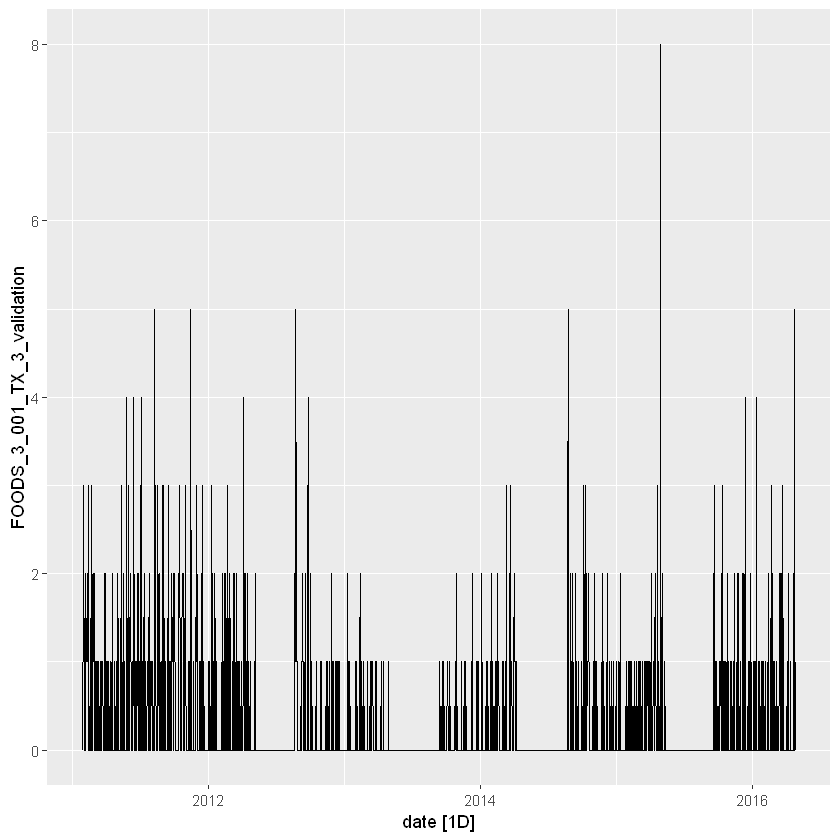

In [57]:
#get all columns that are of type factor
factor_columns <- sapply(sales_train_val_set, is.factor)
#change them from type factor to numeric so the numeric data can be plotted 
sales_train_val_set[factor_columns] <- lapply(sales_train_val_set[factor_columns], function(x) as.numeric(as.character(x)))                                 


#plotting the amount of sales per day of the first item 
sales_train_val_set %>%
    select(FOODS_3_001_TX_3_validation, date) %>%
    as_tsibble() %>% 
    autoplot()
               

An STL decomposition is used to get more insight into the different timeseries. 

Using `date` as index variable.

Using `date` as index variable.



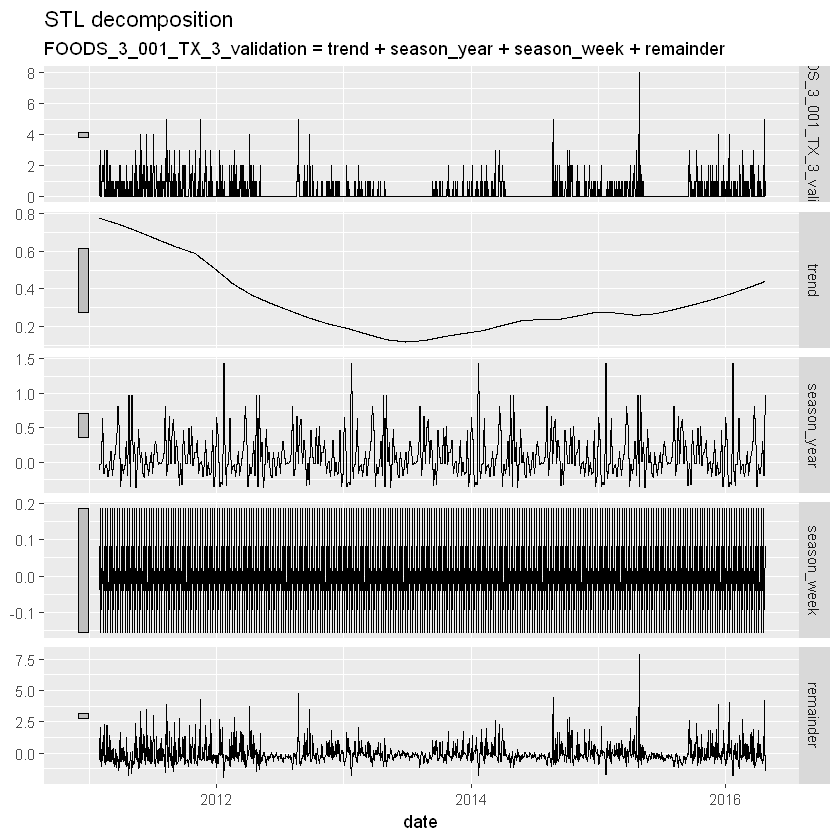

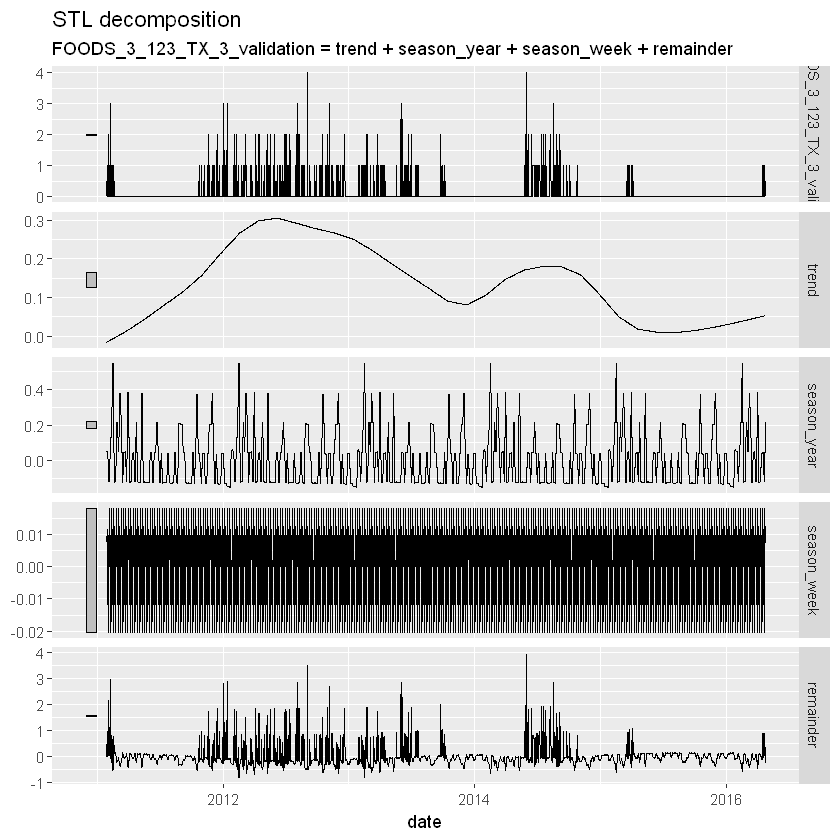

In [58]:
sales_train_val_set %>%
    select(FOODS_3_001_TX_3_validation, date) %>%
    as_tsibble() %>% 
    model(
        STL(FOODS_3_001_TX_3_validation ~ season(window = "periodic"))
        ) %>%
    components() %>%
        autoplot()

sales_train_val_set %>%
    select(FOODS_3_123_TX_3_validation, date) %>%
    as_tsibble() %>% 
    model(
        STL(FOODS_3_123_TX_3_validation ~ season(window = "periodic"))
        ) %>%
    components() %>%
        autoplot()


	Precomputing distance matrix...

Iteration 1: Changes / Distsum = 100 / 3900.143
Iteration 2: Changes / Distsum = 32 / 3025.752
Iteration 3: Changes / Distsum = 14 / 2806.433
Iteration 4: Changes / Distsum = 5 / 2884.138
Iteration 5: Changes / Distsum = 0 / 2884.138

	Elapsed time is 0.2 seconds.



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


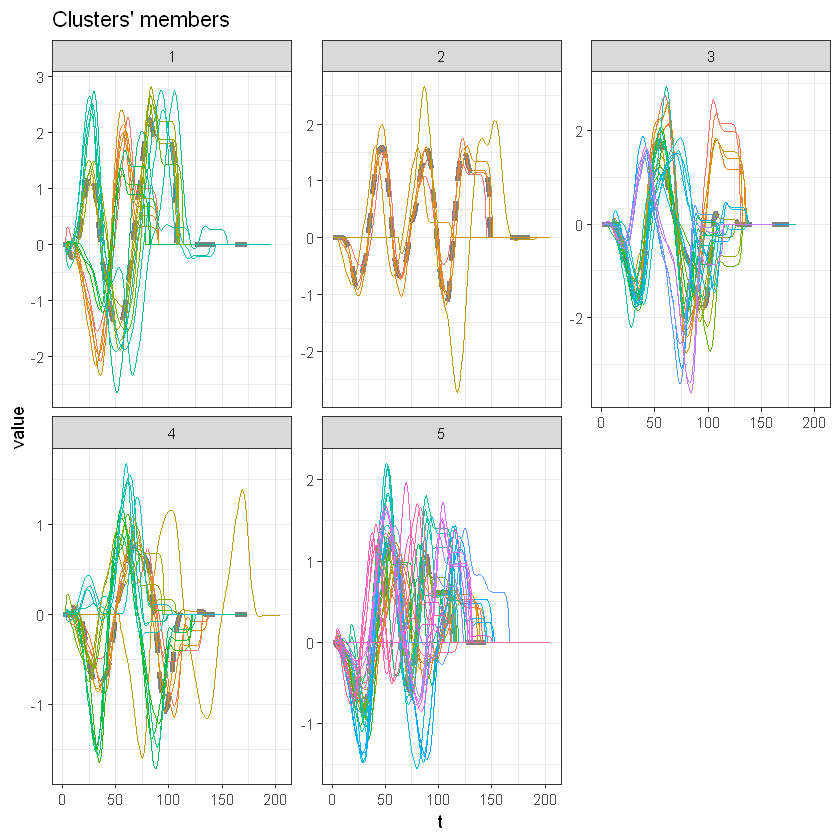

In [59]:
pc <- tsclust(CharTraj, type = "partitional", k = 5L, 
              distance = "dtw_basic", centroid = "pam", 
              seed = 3247L, trace = TRUE,
              args = tsclust_args(dist = list(window.size = 20L)))

plot(pc)

In [60]:
typeof(CharTraj)

[1] "list"

In order to use a cluster model we need to transform t tibble back to a dataframe so we eventually can convert it to a list with doubles. 

In [65]:
df_train_set <- sales_train_val_set[colnames(sales_train_val_set)]


rownames(df_train_set) <- 1:nrow(df_train_set)

df_train_set

,FOODS_3_001_TX_3_validation,FOODS_3_002_TX_3_validation,FOODS_3_003_TX_3_validation,FOODS_3_004_TX_3_validation,FOODS_3_005_TX_3_validation,FOODS_3_006_TX_3_validation,FOODS_3_007_TX_3_validation,FOODS_3_008_TX_3_validation,FOODS_3_009_TX_3_validation,FOODS_3_010_TX_3_validation,...,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,0,0,0,0,0,0,27,0,0,0,...,9,3,0,7,0,0,0,0,0,2011-01-29
2,2,0,0,0,1,0,27,0,0,0,...,0,2,0,5,0,1,0,0,0,2011-01-30
3,1,0,0,0,1,0,8,0,0,0,...,3,1,0,5,0,0,0,0,0,2011-01-31
4,3,0,0,0,0,0,0,0,0,0,...,0,3,0,3,0,1,2,0,0,2011-02-01
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2011-02-02
6,0,0,0,0,1,0,11,0,0,0,...,6,0,0,3,0,2,1,0,0,2011-02-03
7,1,0,0,0,2,0,8,0,0,0,...,1,1,0,0,0,0,0,0,0,2011-02-04
8,0,0,0,0,0,0,33,0,0,0,...,5,0,0,1,0,1,0,0,0,2011-02-05
9,2,0,0,0,0,0,16,0,0,0,...,0,1,0,7,0,1,1,0,0,2011-02-06
